In [8]:
import pandas as pd 
df=pd.DataFrame({
    'age':[25,30,35,40,45],
    'salary':[5000,6000,7000,8000,9000],
    'country_code':[1,1,1,1,1]
})
df

,age,salary,country_code
0,25,5000,1
1,30,6000,1
2,35,7000,1
3,40,8000,1
4,45,9000,1


In [9]:
from sklearn.feature_selection import VarianceThreshold
selector=VarianceThreshold(threshold=0.1)
selected_data=selector.fit_transform(df)
selected_features=df.columns[selector.get_support()]
print("Selected Features : ",selected_features)

Selected Features :  Index(['age', 'salary'], dtype='object')


In [10]:
data=pd.DataFrame({
    'age':[25,30,35,40,45],
    'Blood_Pressure':[120,130,125,135,128],
    'Cholestrol':[200,210,190,220,205],
    'Gender':[0,1,0,1,0],
    'country_code':[1,1,1,1,1],
    'Hosital_ID':[1,1,1,1,1],
    'Machine_Version':[1,1,1,1,1]
})
data

,age,Blood_Pressure,Cholestrol,Gender,country_code,Hosital_ID,Machine_Version
0,25,120,200,0,1,1,1
1,30,130,210,1,1,1,1
2,35,125,190,0,1,1,1
3,40,135,220,1,1,1,1
4,45,128,205,0,1,1,1


In [11]:
selector = VarianceThreshold(threshold=0.1)
selected_data = selector.fit_transform(data)
selected_features = data.columns[selector.get_support()]
print("Selected features:", selected_features)

Selected features: Index(['age', 'Blood_Pressure', 'Cholestrol', 'Gender'], dtype='object')


# Correlation Coefficient

In [ ]:
import numpy as np
df=pd.DataFrame({
    'size_sqft':[1000,1500,2000,2500,3000],
    'tiles_count':[100,150,200,250,300],
    'price':[200000,300000,400000,500000,600000]
})
df

,size_sqft,tiles_count,price
0,1000,100,200000
1,1500,150,300000
2,2000,200,400000
3,2500,250,500000
4,3000,300,600000


In [13]:
correlation_matrix = df.corr()
print(correlation_matrix)

             size_sqft  tiles_count  price
size_sqft          1.0          1.0    1.0
tiles_count        1.0          1.0    1.0
price              1.0          1.0    1.0


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

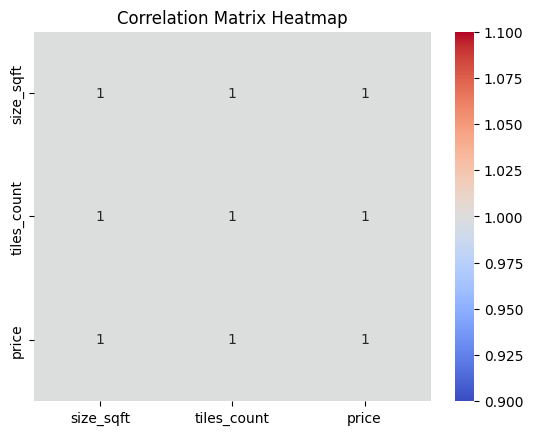

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')

In [16]:
#Removing highly corelated features
upper=correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(bool))
to_drop=[column for column in upper.columns if any(upper[column]>0.95)]
print("Highly correlated features to drop:",to_drop)

Highly correlated features to drop: ['tiles_count', 'price']


In [19]:
data = {
    "House Size (sqft)": [1000, 1500, 1800, 2000, 2500, 3000],
    "Number of Tiles":   [200, 300, 360, 400, 500, 600],
    "Construction Cost": [50000, 75000, 90000, 100000, 125000, 150000],
    "Bedrooms":          [2, 3, 3, 4, 4, 5],
    "Market Price":      [120000, 180000, 210000, 250000, 310000, 400000]
}
df = pd.DataFrame(data)
df

,House Size (sqft),Number of Tiles,Construction Cost,Bedrooms,Market Price
0,1000,200,50000,2,120000
1,1500,300,75000,3,180000
2,1800,360,90000,3,210000
3,2000,400,100000,4,250000
4,2500,500,125000,4,310000
5,3000,600,150000,5,400000


In [21]:
corr_matrix = df.corr()
corr_matrix

,House Size (sqft),Number of Tiles,Construction Cost,Bedrooms,Market Price
House Size (sqft),1.000000,1.000000,1.000000,0.964439,0.995527
Number of Tiles,1.000000,1.000000,1.000000,0.964439,0.995527
Construction Cost,1.000000,1.000000,1.000000,0.964439,0.995527
Bedrooms,0.964439,0.964439,0.964439,1.000000,0.969318
Market Price,0.995527,0.995527,0.995527,0.969318,1.000000


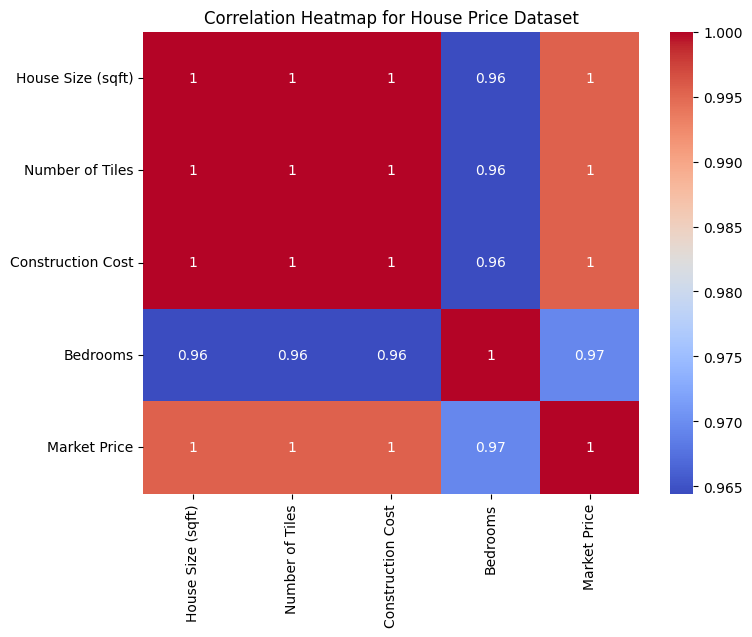

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap for House Price Dataset")
plt.show()

In [32]:
upper=corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.95)]
print("Highly correlated features to drop:", high_corr_features)
to_drop = high_corr_features
df_reduced = df.drop(columns=to_drop)
print("\nReduced Dataset:\n", df_reduced)

Highly correlated features to drop: ['Number of Tiles', 'Construction Cost', 'Bedrooms', 'Market Price']

Reduced Dataset:
    House Size (sqft)
0               1000
1               1500
2               1800
3               2000
4               2500
5               3000


# Chi-Square Test

In [38]:
x=pd.DataFrame({
    'gender':[0,1,0,1,1],
    'married':[1,1,0,0,1],
    'income':[20000,40000,50000,30000,60000]
})
y=[0,1,1,0,1]
x

,gender,married,income
0,0,1,20000
1,1,1,40000
2,0,0,50000
3,1,0,30000
4,1,1,60000


In [40]:
#chi-Square requires non-negative values
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
chi2_selector = SelectKBest(chi2, k=2)
x_kbest = chi2_selector.fit_transform(x_scaled, y)
selected_features = x.columns[chi2_selector.get_support()]
print("Selected features:", selected_features)

Selected features: Index(['married', 'income'], dtype='object')


# Loan Approval Classification

In [42]:
data = {
    "Gender": ["Male", "Female", "Male", "Female", "Male", "Female"],
    "Marital Status": ["Yes", "No", "Yes", "Yes", "No", "No"],
    "Education Level": ["Graduate", "Non-Graduate", "Graduate", "Graduate", "Non-Graduate", "Graduate"],
    "Applicant Income": [5000, 3000, 4000, 6000, 3500, 4500],
    "Property Area": ["Urban", "Rural", "Urban", "Semiurban", "Rural", "Urban"],
    "Favorite Color": ["Red", "Blue", "Green", "Yellow", "Pink", "Black"],
    "Loan Status": ["Approved", "Rejected", "Approved", "Approved", "Rejected", "Approved"]
}
df = pd.DataFrame(data)
df

,Gender,Marital Status,Education Level,Applicant Income,Property Area,Favorite Color,Loan Status
0,Male,Yes,Graduate,5000,Urban,Red,Approved
1,Female,No,Non-Graduate,3000,Rural,Blue,Rejected
2,Male,Yes,Graduate,4000,Urban,Green,Approved
3,Female,Yes,Graduate,6000,Semiurban,Yellow,Approved
4,Male,No,Non-Graduate,3500,Rural,Pink,Rejected
5,Female,No,Graduate,4500,Urban,Black,Approved


In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for columns in df.columns:
    df[columns] = le.fit_transform(df[columns])
x= df.drop("Loan Status", axis=1)
y = df["Loan Status"]

In [48]:
x_scaled = scaler.fit_transform(x)
chi2_selector = SelectKBest(chi2, k=3)
X_kbest = chi2_selector.fit_transform(x_scaled, y)
selected_features = x.columns[chi2_selector.get_support()]
print("Selected features:", selected_features)

Selected features: Index(['Marital Status', 'Education Level', 'Property Area'], dtype='object')
